In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
%matplotlib inline
import seaborn as sns
import pandas as pd

In [46]:
def y_func(x):
    return (0.5+0.4*np.sin(2*np.pi*x))

def generate_data(n):
    X_train=np.sort(np.random.uniform(0,1,n))
    X_test=np.sort(np.random.uniform(0,1,n))
    noise_train=np.random.normal(0,0.05,n)
    noise_test=np.random.normal(0,0.05,n)
    Y_train=y_func(X_train)+noise_train
    Y_test=y_func(X_test)+noise_test
    d=[i for i in range (0,10)]
    poly=dict()
    for d in range(0,10):
        poly[d]=np.polyfit(X_train,Y_train,d)
    fits_train,fits_test=dict(),dict()
    for key in poly:
        fits_train[key]=np.polyval(poly[key],X_train)
        fits_test[key]=np.polyval(poly[key],X_test)
    return(X_train,X_test,Y_train,Y_test,fits_train,fits_test,poly)

def mse(A,B):
    return (np.square(A - B)).mean(axis=None)

def plot_fits(X_train,X_test,Y_test,fits):
    fig,axs= plt.subplots(4,3, figsize =( 12,9))
    for k,(i,j) in enumerate(product(range(0,3),range(0,3))):
        axs[i, j].plot(X_train,Y_train,'ro')
        axs[i, j].plot(X_test,Y_test,'bo')
        axs[i, j].plot(X_test, fits[k])
        axs[i, j].set_title(f'{k}-order')
    axs[3,0].plot(X_train,Y_train,'ro',label='train')
    axs[3,0].plot(X_test,Y_test,'bo',label='test')
    axs[3,0].plot(X_test,fits[9],label='fit')
    axs[3,0].set_title('9-order')
    for ax in axs.flat:
        ax.set(xlabel='X', ylabel='Y')
        ax.label_outer()
        #ax.set_xlim([-0.5,1.5])
        ax.set_ylim([-0.5,1.5])
    fig.legend(loc='right')
    fig.suptitle(f'N = {n}')

def plot_errors(results):
    fig,(ax1, ax2, ax3)=  plt.subplots(3,figsize =(12,9))
    fig.suptitle('Error for different N')
    ax1.plot(results[9][0],'ro',label='train')
    ax1.plot(results[9][1],'bo',label='test')
    ax1.set_title('MSE for N=9')
    ax2.plot(results[15],'ro',results[15][1],'bo')
    ax2.set_title('MSE for N=15')
    ax3.plot(results[100],'ro',results[100][1],'bo')
    ax3.set_title('MSE for N=100')
    fig.legend(loc='right')
    for ax in (ax1, ax2, ax3):
        ax.set(xlabel='X', ylabel='Y')
        ax.label_outer()

1. Consider the function: $y(x)=0.5+0.4sin(2\pi x)$, for x in [0,1] <br>
Use this function to generate two noisy sets of n points (train and test)
that will be used for modeling y, for <br> n = 9, 15, 100. <br> The x-coordinates should
be uniformly (at random) distributed over [0, 1], <br> y-coordinates should be con-
taminated with Gaussian noise with $\mu = 0; \sigma = 0.05$. <br>
*Hint*: You can use the numpy.random.uniform and numpy.random.normal
functions.<br>
<br>
2. Find the best polynomial approximation of degree d (d = 0, 1, ..., 9) of the training set and plot the results. <br>
*Hint*: check the numpy.polyfit and numpy.polyval functions

In [14]:
n=9
#(X_train,X_test,Y_train,Y_test,fits,poly)=generate_data(n)
#plot_fits(X_train,X_test,Y_test,fits)

In [13]:
n=15
#(X_train,X_test,Y_train,Y_test,fits,poly)=generate_data(n)
#plot_fits(X_train,X_test,Y_test,fits)

In [12]:
n=100
#(X_train,X_test,Y_train,Y_test,fits,poly)=generate_data(n)
#plot_fits(X_train,X_test,Y_test,fits)

Generate 3 plots (one for each value of n) that demonstrate the approximation error (MSE) on the train and test sets as a function of the polynomial
degree. Generates all these 3*10 + 3 gures.

<ipython-input-28-3f08828df9da>:5: RankWarning: Polyfit may be poorly conditioned
  (X_train,X_test,Y_train,Y_test,fits_train,fits_test,poly)=generate_data(n)


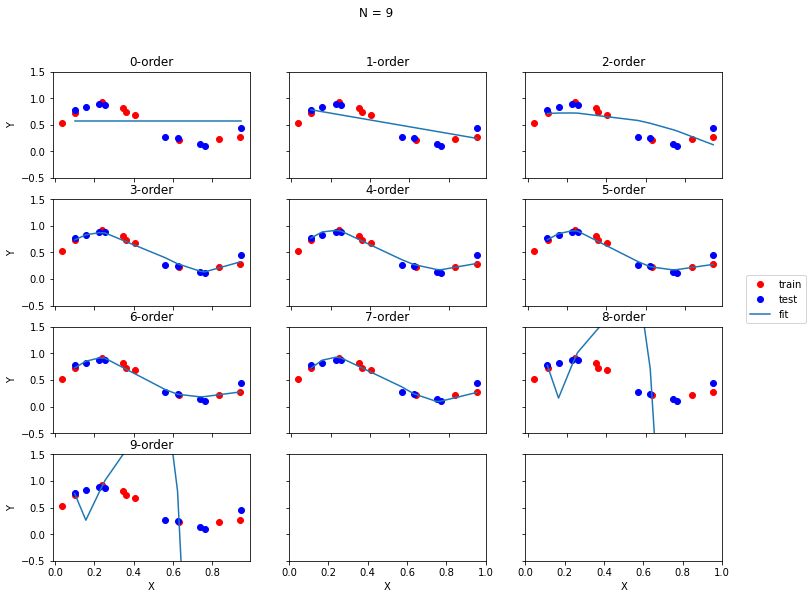

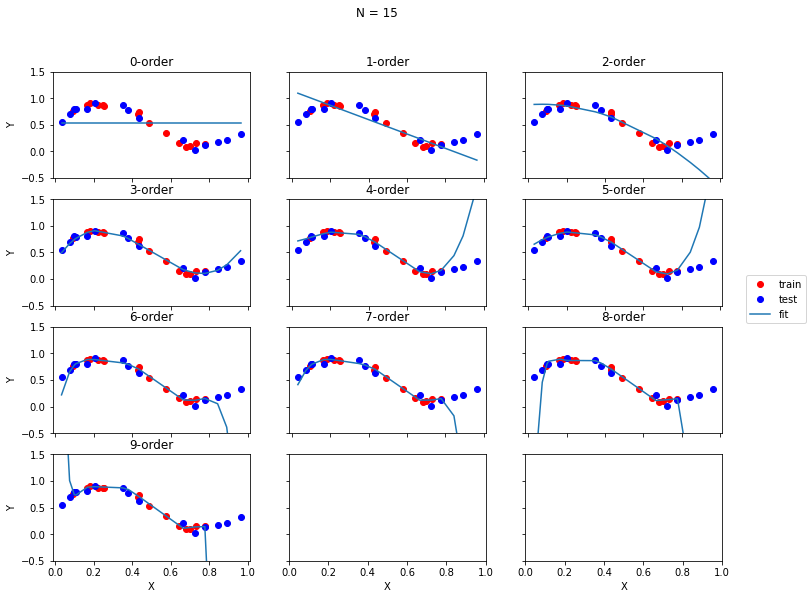

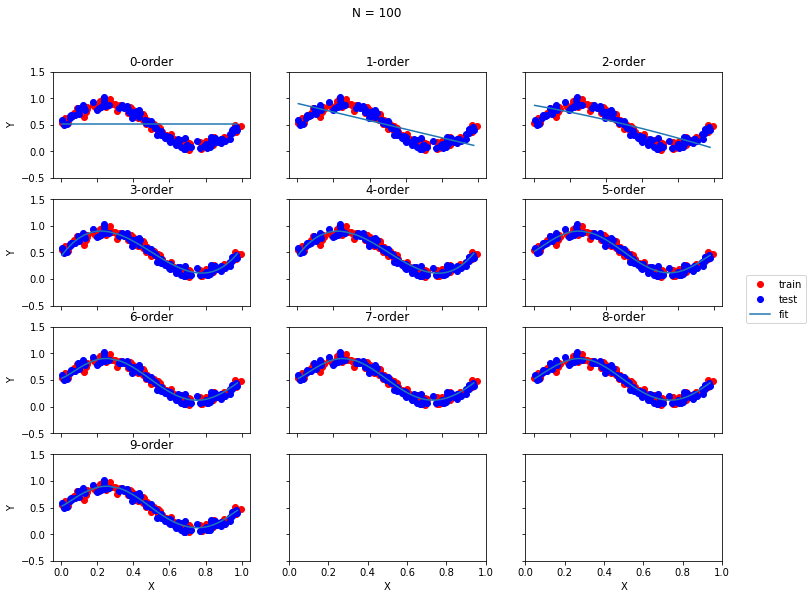

In [28]:
N = [9,15,100]
errors_train=dict()
errors_test=dict()
for n in N:
    (X_train,X_test,Y_train,Y_test,fits_train,fits_test,poly)=generate_data(n)
    plot_fits(X_train,X_test,Y_test,fits_test)
    errors_train, errors_test=np.zeros(10), np.zeros(10)
    for d in range(0,10):
        errors_train[d]=mse(fits_train[d],Y_train)
        errors_test[d]=mse(fits_test[d],Y_test)
    errors_dict[n]=(errors_train,errors_test)

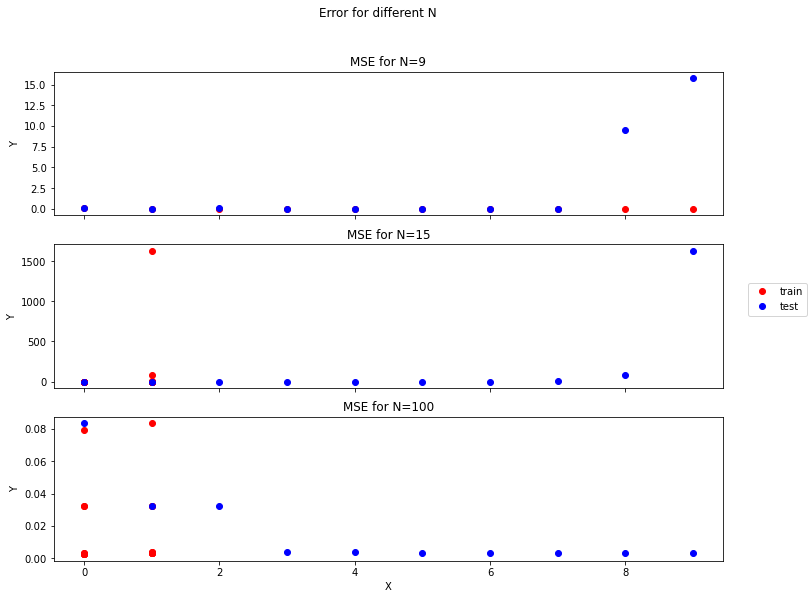

In [45]:
plot_errors(errors_dict)

4. You should see that higher degree polynomials can fit well to the training data, but can have problems to generalize to the test data when there is only a small number of samples. This is called overfitting. One way to avoid this is to enforce the absolute values of our model parameters, the coefficients of the polynomial, to be relatively small. <br>
One option is to add the sum of squared coefficients $\lambda\sum_{i=0}^{M}w^{2}$ to the error function. Here $\lambda$ is a tunable parameter that
controls the penalty for coeffcients that have exceedingly large values.
5. Now set d = 9. Play with different values for and plot the error on the
train and test set as a function of for each value of n (3 figures).

Consider a unit cube in n-dimensional space $U_{n} = [0; 1]^{n}$, and an n-dimensional unit ball $B_{n}$ that is included in $U_{n}$:
$B_{n}=\{(x_{1},x_{2},...,x_{n})|(x_{1}-0.5)^{2}+(x_{2}-0.5)^{2}+...+(x_{n}-0.5)^{2}<0.5^{2}\}$<br>
for $n=1,2,...,100$
1. Find the number of vertices ("corners") of $U_{n}, Corners(n)$

In [73]:
def cornersU(n):
    return 2**n

2. Calculate the length of the longest diagonal of $U_{n}$, $DiagU(n)$

In [76]:
from scipy.spatial.distance import euclidean
def diagU(n):
    point1=[0]*n
    point2=[1]*n
    return euclidean(point1,point2)

3. What is the volume of $B_{n}$ and how does it change as the number of dimensions increases?

In [115]:
def volumne_sphere_approx(n):
    #points=np.zeros((n,10**6))
    volume=0
    for x in range(0,10**6):
        point=np.random.uniform(0,1,n)
        #points[:,x]=point
        distance=euclidean(point,[0.5]*n)
        volume+=distance<0.5
    return volume/(10**6)
#points=points_n_dim(3)


Aproximating costs a long time. Exact calculation: <br>
Volume for a n-ball:
$V_{n}(R)=\frac{\pi^{\frac{n}{2}}}{\Gamma(\frac{n}{2}+1)}R^{n}$

In [120]:
from scipy.special import gamma
def volume_sphere(r,n):
    teller=np.pi**(n/2)
    noemer=gamma((n/2)+1)
    return (teller/noemer)*(r**n)
    

4. Calculate the volume of the "0.01-skin" of $U_{n}$: <br>
$volumeS(n)=1^{n}-(1-2*0.01)^{n}$


In [128]:
def volumeS(n):
    return 1-(1-2*0.1)**n

In [131]:
n=[x for x in range(1,101)]
corners=[cornersU(x) for x in range(1,101)]
diag=[diagU(x) for x in range(1,101)]
volumes=[volume_sphere(0.5,x) for x in range(1,101)]
skins=[volumeS(x) for x in range(1,101)]

arr=np.array([n,corners,diag,volumes,skins])
df=pd.DataFrame(arr.transpose(),columns=['n','corners','diag','volumes','skins'])
df

,n,corners,diag,volumes,skins
0,1,2,1,1,0.2
1,2,4,1.41421,0.785398,0.36
2,3,8,1.73205,0.523599,0.488
3,4,16,2,0.308425,0.5904
4,5,32,2.23607,0.164493,0.67232
...,...,...,...,...,...
95,96,79228162514264337593543950336,9.79796,7.42003e-67,1
96,97,158456325028528675187087900672,9.84886,9.41803e-68,1
97,98,316912650057057350374175801344,9.89949,1.18932e-68,1
98,99,633825300114114700748351602688,9.94987,1.49432e-69,1


5. For $n=2,4,8,...,1024$ generate 1000 points in $U_{n}$, uniformly distributed, find distances between all pairs of these points, and produce a histogram of these distances.

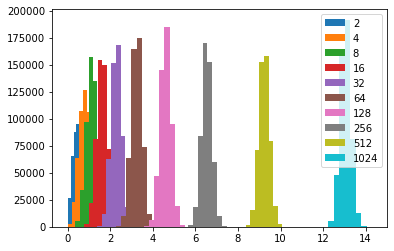

In [150]:
from itertools import combinations

def histogram(distances,n):
    plt.hist(distances,label=f'{n}')
    plt.legend(loc='upper right')

N = [2**x for x in range(1,11)]
for n in N:
    points=list()
    distances=list()
    for x in range(0,1000):
        points.append(np.random.uniform(0,1,n))
    for i,j in combinations(points,2):
        distances.append(euclidean(i,j))
    histogram(distances,n)

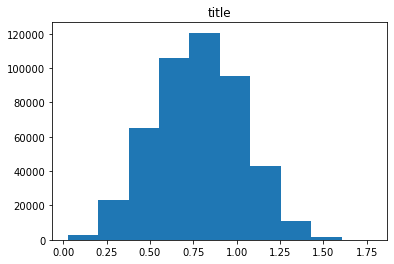

In [147]:

histogram(distances)